In [1]:
import numpy as np
import pandas as pd
pd.get_option("display.max_columns")
pd.set_option('display.max_columns', 1000)
pd.get_option("display.max_rows")
pd.set_option('display.max_rows', 1000)

f=open('aaindex1.dat', 'r')

fragI=0
raw=''
ID=''
ID_array=[]
AAall=[[]]
title=''
title_array=[]


while True:
    data = f.readline()
    data = data.rstrip()
    if data == '':
        break    
    elif data.startswith('I'):
        fragI = 1
    elif data.startswith('H'):
        ID=data[2:]
    elif data.startswith('D'):
        title=data[2:]        
    elif fragI==1 and not data.startswith('//'):
        raw+=data
    elif data.startswith('//'):
        if not 'NA' in raw:
            para = raw.split()
            AAall.append(para)
            ID_array.append(ID)
            title_array.append(title)
            raw=''
            fragI=0
        else:
            raw=''
            fragI=0
            
AAall.remove([])

columns=['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V']

df_index=pd.DataFrame(AAall,index=ID_array,columns=columns)

In [2]:
pm=open('ppm_98_TMRstart.fas','r')

fas = [[]]

while True:
    reading = pm.readline()
    reading = reading.rstrip()

    if not reading.startswith('>'):
        if reading == '':
            break
        fas.append(list(reading))

fas.remove([])
columns=list(range(-25,26))
df_pm=pd.DataFrame(fas,columns=columns)


In [3]:
ALLave=[[]]
ppm_variance=[[]]

k=0
while k<len(df_index.index):
    l=0
    value=[]
    NAcount=0

    while l<len(df_index.columns):
        if df_index.iat[k,l]=="NA":
            NAcount=1
            value.append('NA')
        else:
            value.append(float(df_index.iat[k,l]))
        l=l+1

    if NAcount==0:
        j=0
        AAnum=[[]]
        while j<len(df_pm.index):
            i=0
            AA=[]
            while i<51:
                AA.append(df_pm.iat[j,i])
                if AA[i]=="A":
                    AA[i]=value[0]
                elif AA[i]=="R":
                    AA[i]=value[1]
                elif AA[i]=="N":
                    AA[i]=value[2]
                elif AA[i]=="D":
                    AA[i]=value[3]
                elif AA[i]=="C":
                    AA[i]=value[4]
                elif AA[i]=="Q":
                    AA[i]=value[5]
                elif AA[i]=="E":
                    AA[i]=value[6]
                elif AA[i]=="G":
                    AA[i]=value[7]
                elif AA[i]=="H":
                    AA[i]=value[8]
                elif AA[i]=="I":
                    AA[i]=value[9]
                elif AA[i]=="L":
                    AA[i]=value[10]
                elif AA[i]=="K":
                    AA[i]=value[11]
                elif AA[i]=="M":
                    AA[i]=value[12]
                elif AA[i]=="F":
                    AA[i]=value[13]
                elif AA[i]=="P":
                    AA[i]=value[14]
                elif AA[i]=="S":
                    AA[i]=value[15]
                elif AA[i]=="T":
                    AA[i]=value[16]
                elif AA[i]=="W":
                    AA[i]=value[17]
                elif AA[i]=="Y":
                    AA[i]=value[18]
                elif AA[i]=="V":
                    AA[i]=value[19]
                elif AA[i]=="X":
                    AA[i]=np.nan
                i=i+1
            AAnum.append(AA)
            j=j+1
    df_AAnum=pd.DataFrame(AAnum)
    sum=df_AAnum.sum()
    ppm_data_number=df_AAnum.count()
    ave=[]
    j=0
    variance=0
    vari_array=[]
    while j<51:
        temp=sum[j]
        temp=temp/(ppm_data_number[j])
        ave.append(temp)
        i=0
        variance=0
        while i<len(df_AAnum.index):
            l=0
            while l<1:
                if not np.isnan(df_AAnum.iat[i,j+l]):
                    variance = variance+(df_AAnum.iat[i,j+l]-temp)**2
                l=l+1
            i=i+1
        variance=variance/(ppm_data_number[j])
        vari_array.append(variance)
        j=j+1
    ALLave.append(ave)
    ppm_variance.append(vari_array)
    k=k+1


In [4]:

columns=list(range(-25,26))
ID_array.insert(0,'0')
title_array.insert(0,'0')
pmave=pd.DataFrame(ALLave,index=ID_array,columns=columns)



In [5]:
npm=open('npm_98_TMRstart.fas','r')

fas = [[]]

while True:
    reading = npm.readline()
    reading = reading.rstrip()

    if not reading.startswith('>'):
        if reading == '':
            break
        fas.append(list(reading))

fas.remove([])
columns=list(range(-25,26))
df_npm=pd.DataFrame(fas,columns=columns)



In [6]:
ALLave=[[]]
npm_variance=[[]]

k=0
while k<len(df_index.index):
    l=0
    value=[]
    NAcount=0
    
    while l<len(df_index.columns):
        if df_index.iat[k,l]=="NA":
            NAcount=1
            value.append('NA')
        else:
            value.append(float(df_index.iat[k,l]))
        l=l+1

    if NAcount==0:
        j=0
        AAnum=[[]]
        while j<len(df_npm.index):
            i=0
            AA=[]
            while i<51:
                AA.append(df_npm.iat[j,i])
                if AA[i]=="A":
                    AA[i]=value[0]
                elif AA[i]=="R":
                    AA[i]=value[1]
                elif AA[i]=="N":
                    AA[i]=value[2]
                elif AA[i]=="D":
                    AA[i]=value[3]
                elif AA[i]=="C":
                    AA[i]=value[4]
                elif AA[i]=="Q":
                    AA[i]=value[5]
                elif AA[i]=="E":
                    AA[i]=value[6]
                elif AA[i]=="G":
                    AA[i]=value[7]
                elif AA[i]=="H":
                    AA[i]=value[8]
                elif AA[i]=="I":
                    AA[i]=value[9]
                elif AA[i]=="L":
                    AA[i]=value[10]
                elif AA[i]=="K":
                    AA[i]=value[11]
                elif AA[i]=="M":
                    AA[i]=value[12]
                elif AA[i]=="F":
                    AA[i]=value[13]
                elif AA[i]=="P":
                    AA[i]=value[14]
                elif AA[i]=="S":
                    AA[i]=value[15]
                elif AA[i]=="T":
                    AA[i]=value[16]
                elif AA[i]=="W":
                    AA[i]=value[17]
                elif AA[i]=="Y":
                    AA[i]=value[18]
                elif AA[i]=="V":
                    AA[i]=value[19]
                elif AA[i]=="X":
                    AA[i]=np.nan
                i=i+1
            AAnum.append(AA)
            j=j+1
    df_AAnum=pd.DataFrame(AAnum)
    sum=df_AAnum.sum()
    npm_data_number=df_AAnum.count()
    ave=[]
    j=0
    variance=0
    vari_array=[]
    while j<51:
        temp=sum[j]
        temp=temp/(npm_data_number[j])
        ave.append(temp)
        i=0
        variance=0
        while i<len(df_AAnum.index):
            l=0
            while l<1:
                if not np.isnan(df_AAnum.iat[i,j+l]):
                    variance = variance+(df_AAnum.iat[i,j+l]-temp)**2
                l=l+1
            i=i+1
        variance=variance/(npm_data_number[j])
        vari_array.append(variance)
        j=j+1
    ALLave.append(ave)
    npm_variance.append(vari_array)
    k=k+1


In [7]:

columns=list(range(-25,26))
npmave=pd.DataFrame(ALLave,index=ID_array,columns=columns)



In [8]:
columns=list(range(-25,26))
df_ppm_variance=pd.DataFrame(ppm_variance,index=ID_array,columns=columns)


In [9]:
columns=list(range(-25,26))
df_npm_variance=pd.DataFrame(npm_variance,index=ID_array,columns=columns)


In [10]:
ALLtvalue=[[0 for i in range(51)]]
i=1
while i<len(df_ppm_variance.index):
    j=0
    t_value_array=[]
    while j<51:
        datanum1=ppm_data_number[j]
        datanum2=npm_data_number[j]
        
        temp1=df_ppm_variance.iat[i,j]*(datanum1-1)+df_npm_variance.iat[i,j]*(datanum2-1)
        variance=temp1/(datanum1+datanum2-2)
        temp2=variance*(1/datanum1+1/datanum2)
        t_value=abs(pmave.iat[i,j]-npmave.iat[i,j])
        
        if temp2!=0:
            t_value=t_value/np.sqrt(temp2)
            t_value_array.append(t_value)
        else :
            t_value_array.append('null')
            
        j=j+1
    ALLtvalue.append(t_value_array)
    i=i+1

In [11]:
print([len(v) for v in ALLtvalue])

[51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51,

In [12]:
from scipy.stats import t
t_boader_list=[]
i=0
while i<51:
    df_number=ppm_data_number[i]+npm_data_number[i]+-2
    t_value=t.ppf(q=0.9999,df=df_number)
    t_boader_list.append(t_value)
    i=i+1


In [13]:
i=0
deference_array=[[]]
for index_pm, row_pm in pmave.iterrows():
    for index_npm, row_npm in npmave.iterrows():
        if index_pm==index_npm:
            deference=abs(row_pm-row_npm)
            deference_array.append(deference)
            i=i+1

CHOC760102
Residue accessible surface area in folded protein (Chothia, 1976)


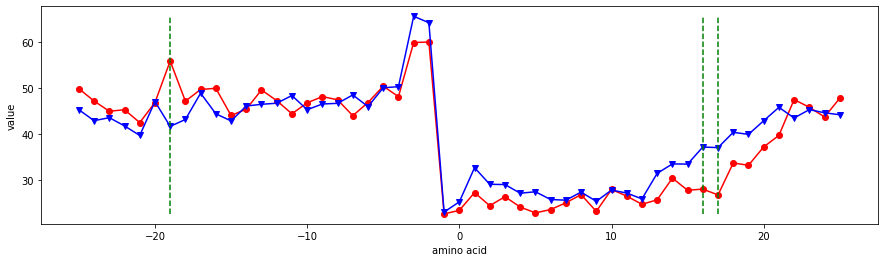

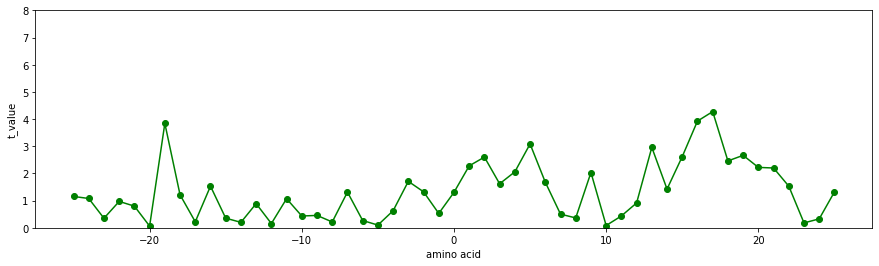

EISD840101
Consensus normalized hydrophobicity scale (Eisenberg, 1984)


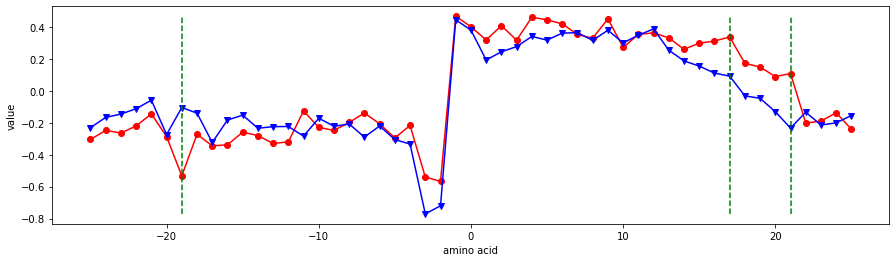

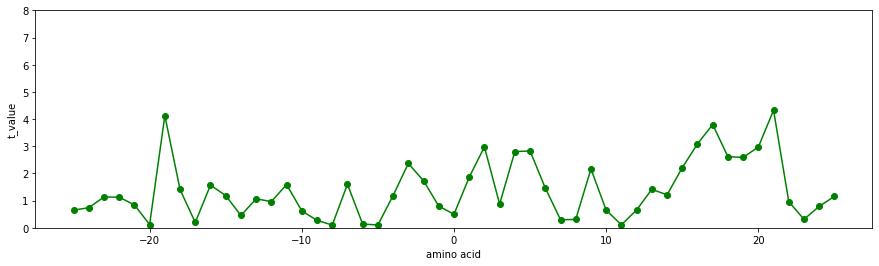

EISD860101
Solvation free energy (Eisenberg-McLachlan, 1986)


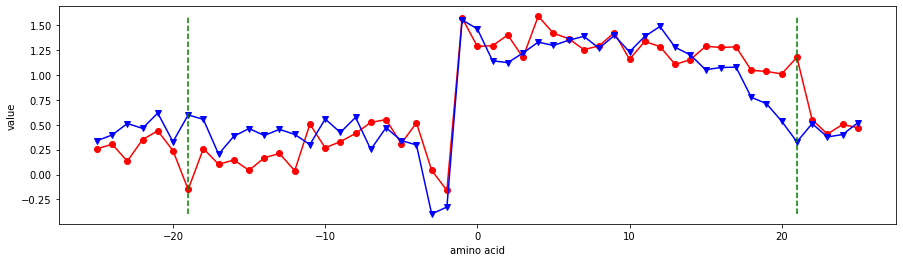

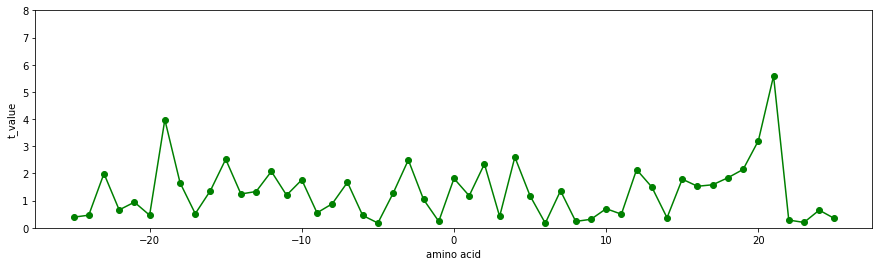

EISD860102
Atom-based hydrophobic moment (Eisenberg-McLachlan, 1986)


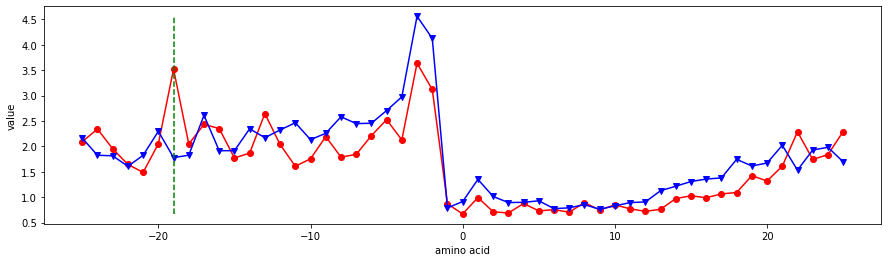

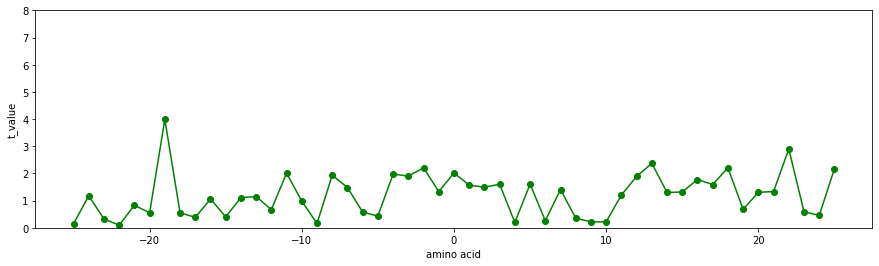

FAUJ880108
Localized electrical effect (Fauchere et al., 1988)


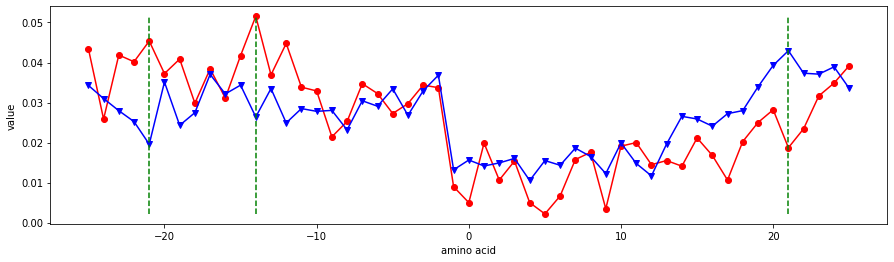

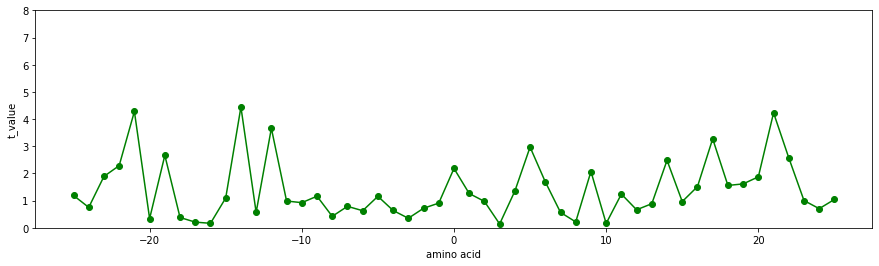

FAUJ880109
Number of hydrogen bond donors (Fauchere et al., 1988)


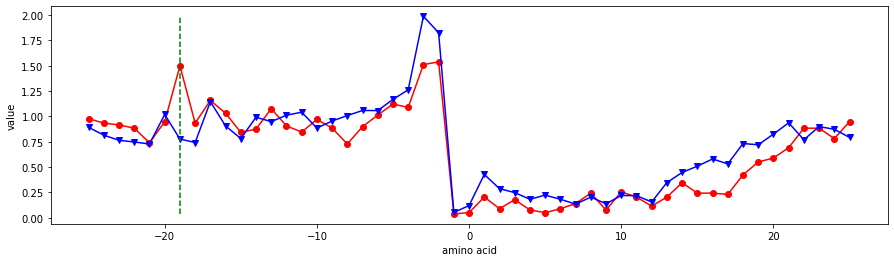

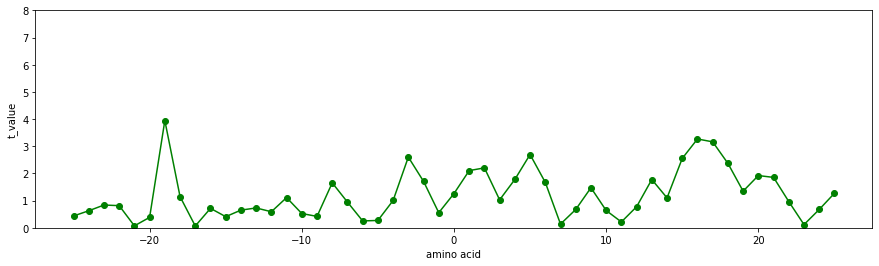

FAUJ880110
Number of full nonbonding orbitals (Fauchere et al., 1988)


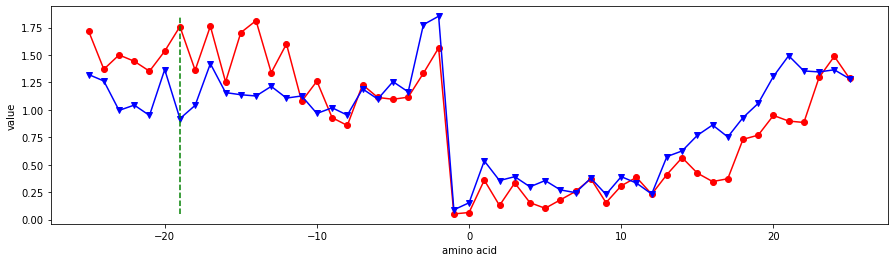

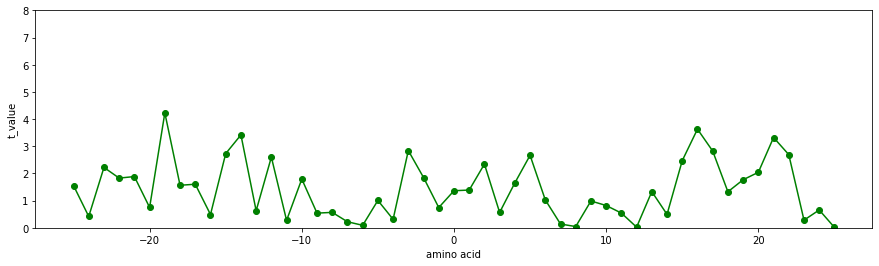

HOPT810101
Hydrophilicity value (Hopp-Woods, 1981)


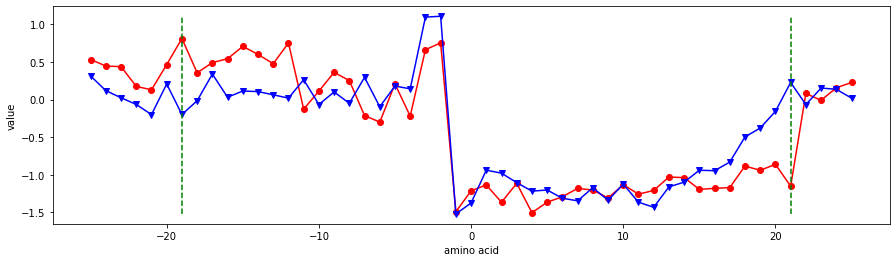

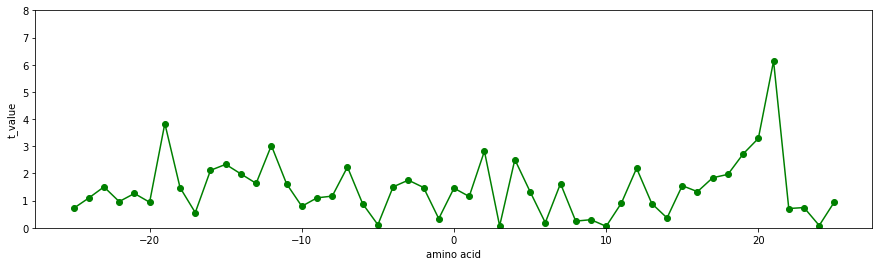

JANJ790102
Transfer free energy (Janin, 1979)


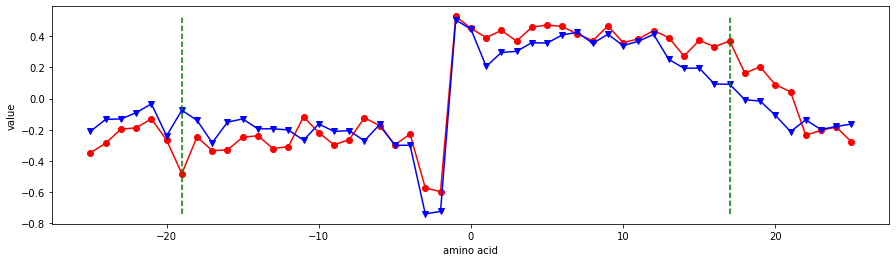

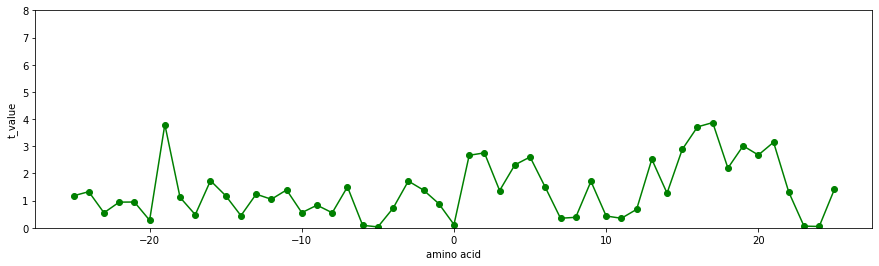

JOND920101
Relative frequency of occurrence (Jones et al., 1992)


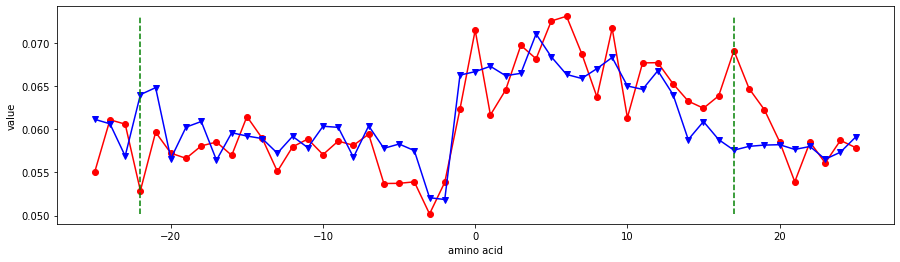

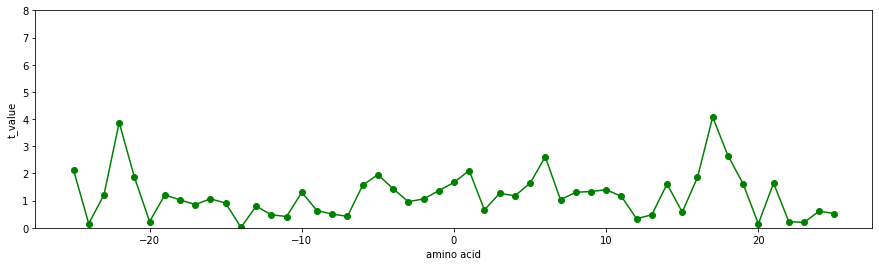

LEVM760101
Hydrophobic parameter (Levitt, 1976)


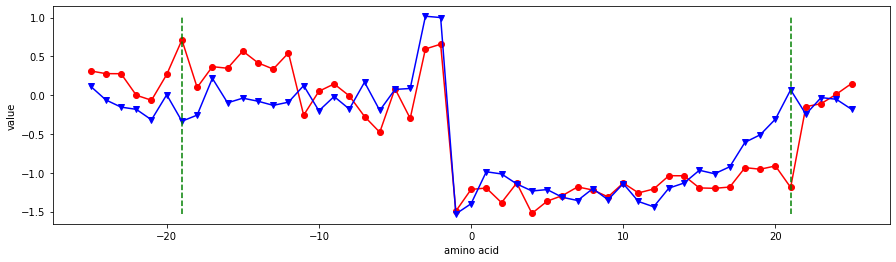

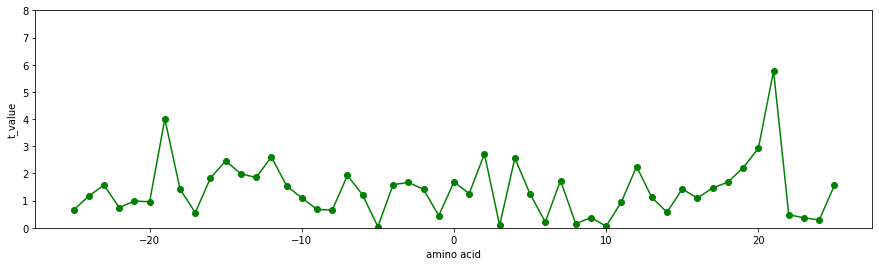

NAKH900101
AA composition of total proteins (Nakashima et al., 1990)


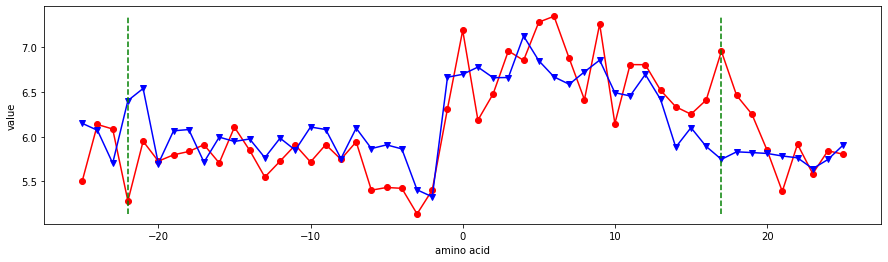

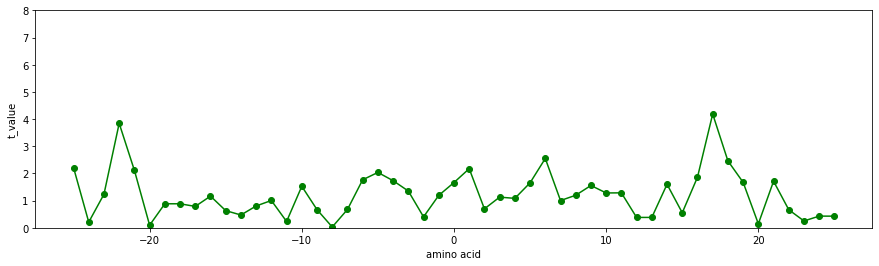

NAKH920107
AA composition of EXT of multi-spanning proteins (Nakashima-Nishikawa, 1992)


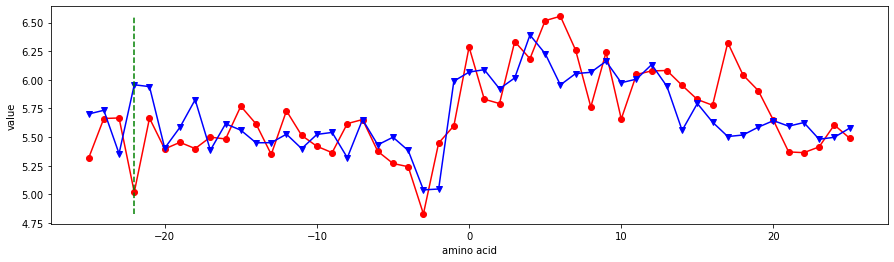

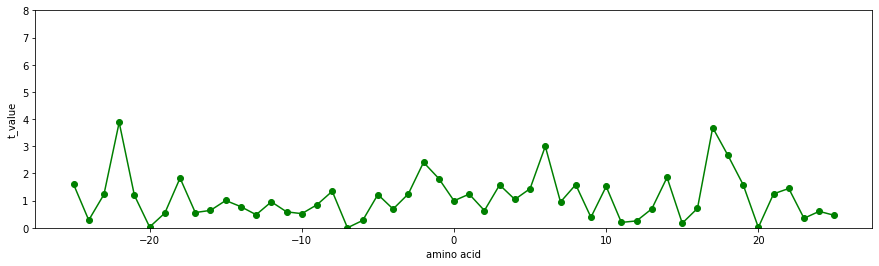

OOBM770101
Average non-bonded energy per atom (Oobatake-Ooi, 1977)


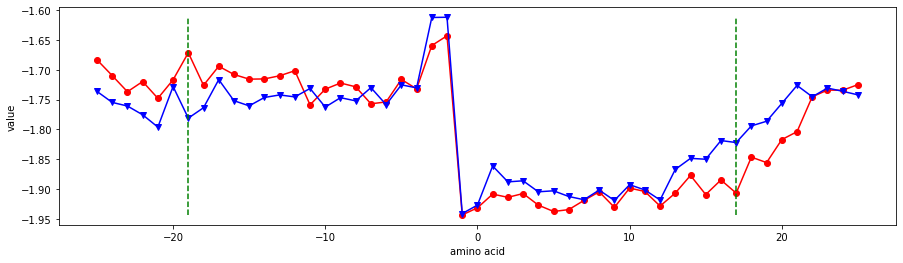

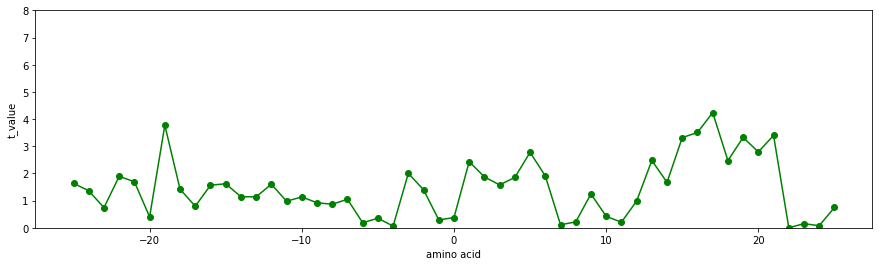

PRAM900101
Hydrophobicity (Prabhakaran, 1990)


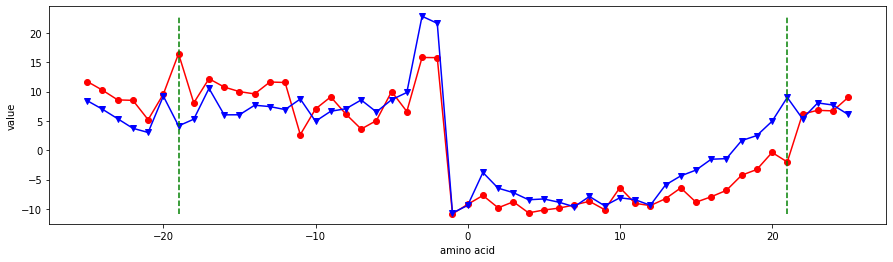

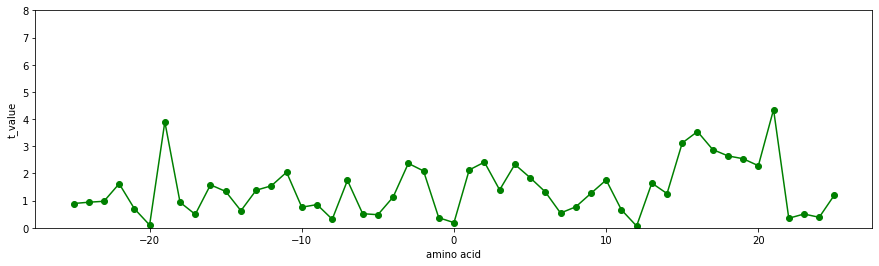

RACS820103
Average relative fractional occurrence in AL(i) (Rackovsky-Scheraga, 1982)


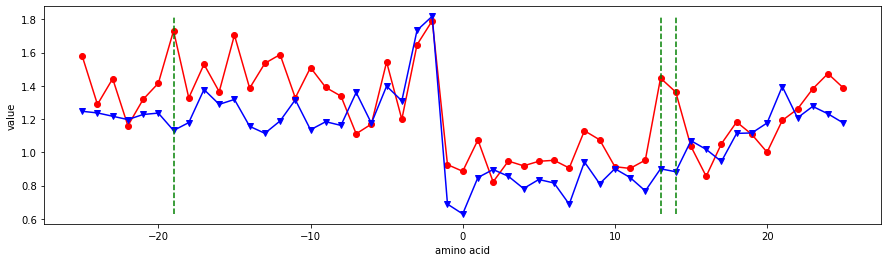

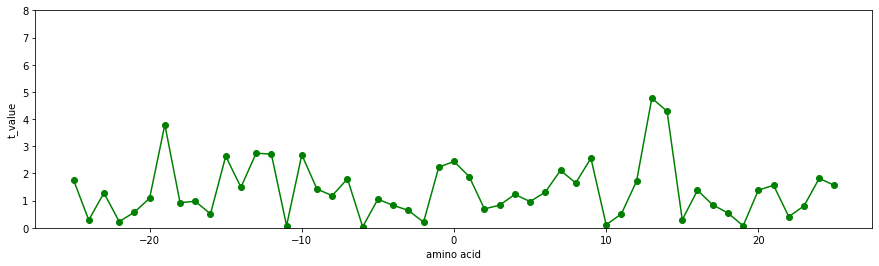

RADA880101
Transfer free energy from chx to wat (Radzicka-Wolfenden, 1988)


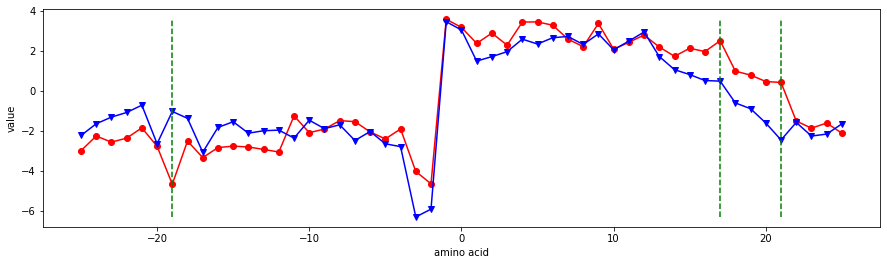

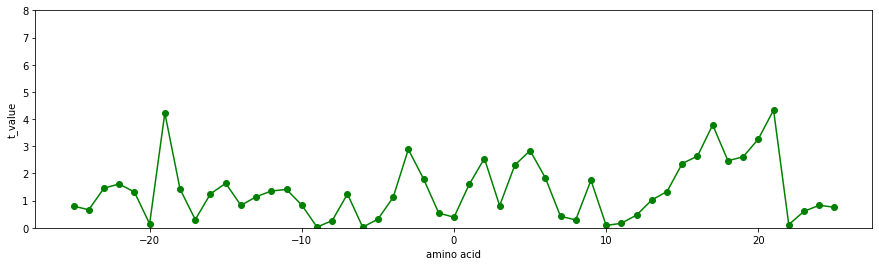

RADA880104
Transfer free energy from chx to oct (Radzicka-Wolfenden, 1988)


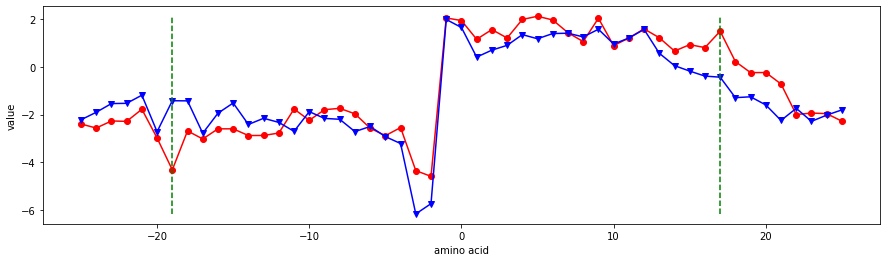

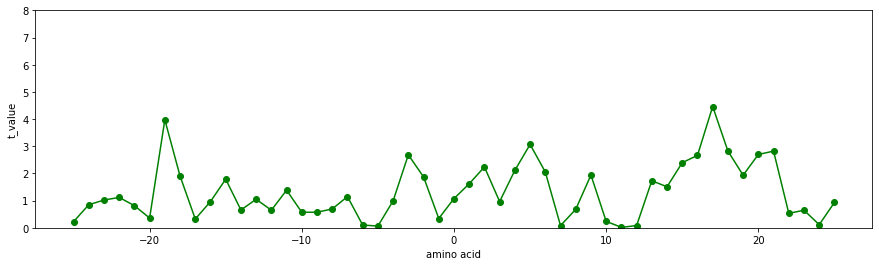

RADA880107
Energy transfer from out to in(95%buried) (Radzicka-Wolfenden, 1988)


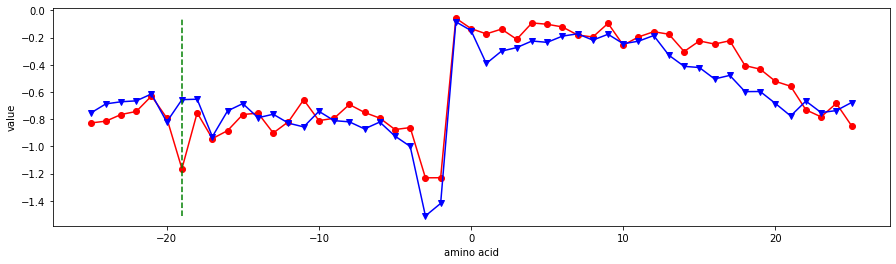

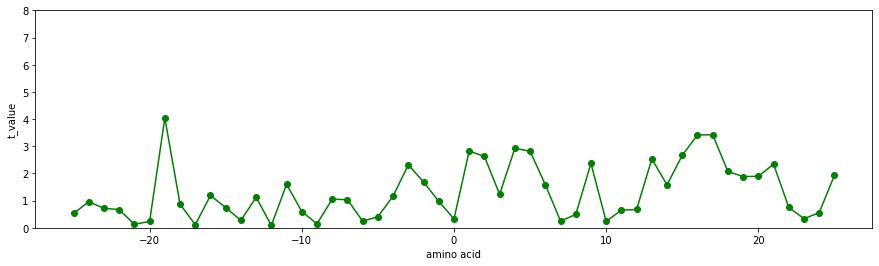

ROSM880101
Side chain hydropathy, uncorrected for solvation (Roseman, 1988)


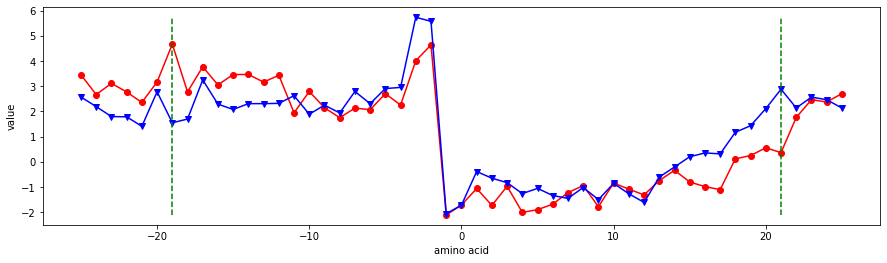

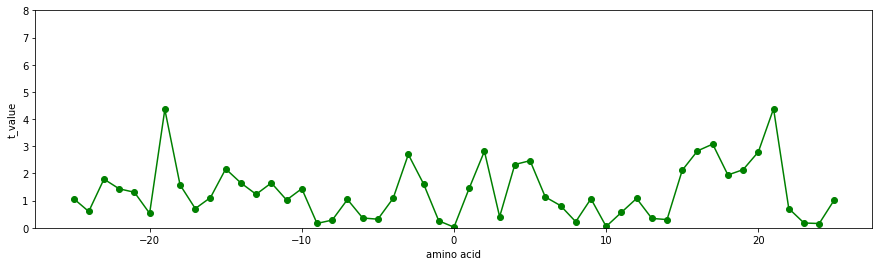

ROSM880102
Side chain hydropathy, corrected for solvation (Roseman, 1988)


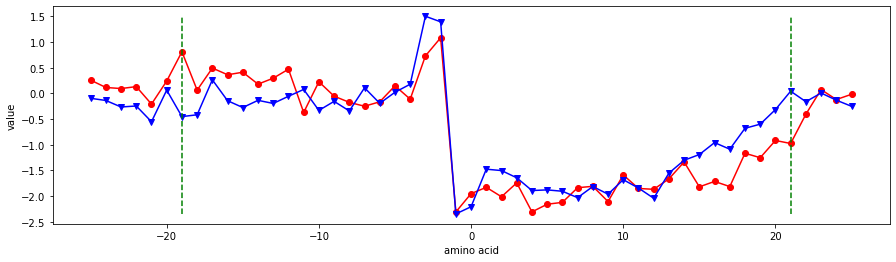

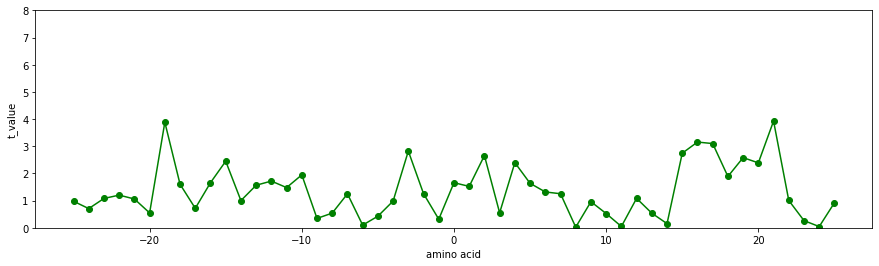

TANS770106
Normalized frequency of chain reversal D (Tanaka-Scheraga, 1977)


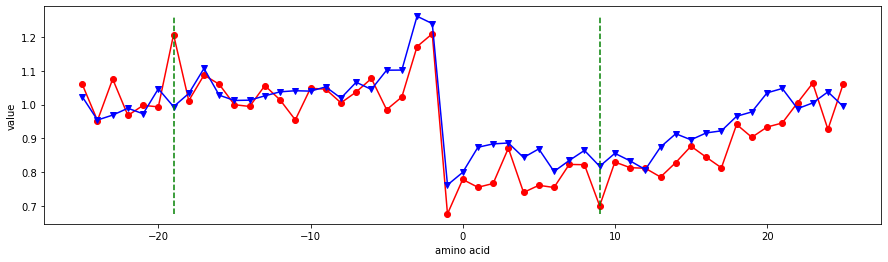

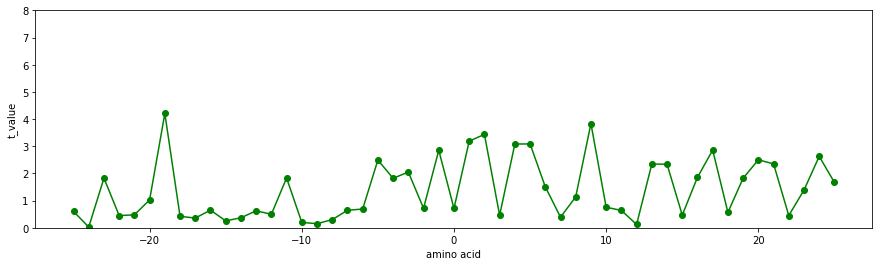

VELV850101
Electron-ion interaction potential (Veljkovic et al., 1985)


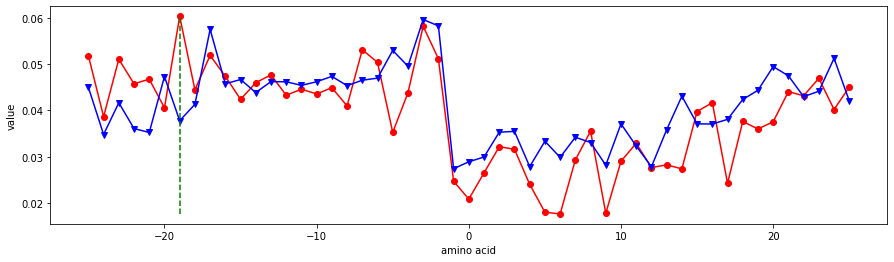

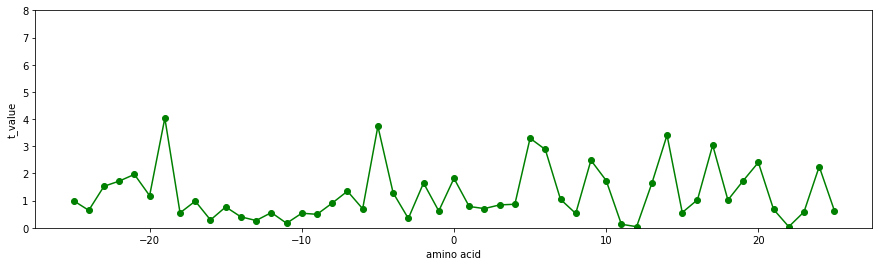

VHEG790101
Transfer free energy to lipophilic phase (von Heijne-Blomberg, 1979)


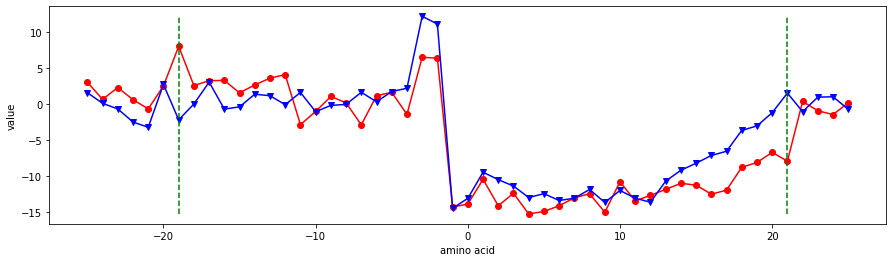

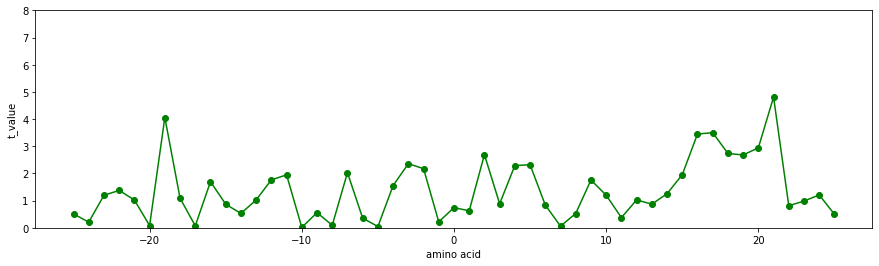

WOLR810101
Hydration potential (Wolfenden et al., 1981)


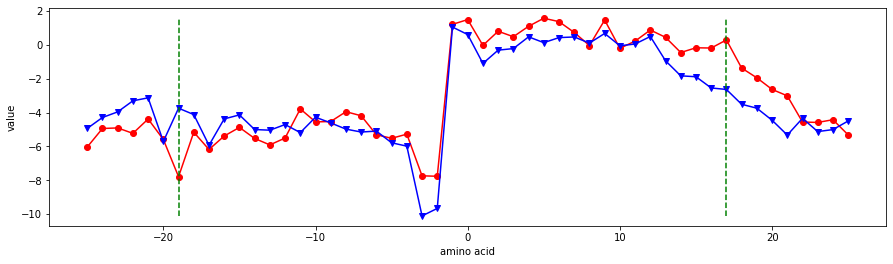

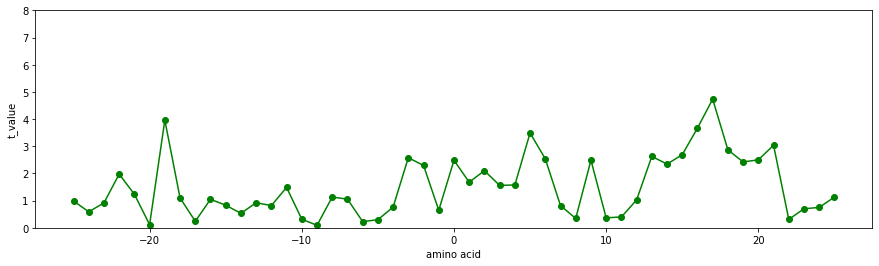

CEDJ970101
Composition of amino acids in extracellular proteins (percent) (Cedano et


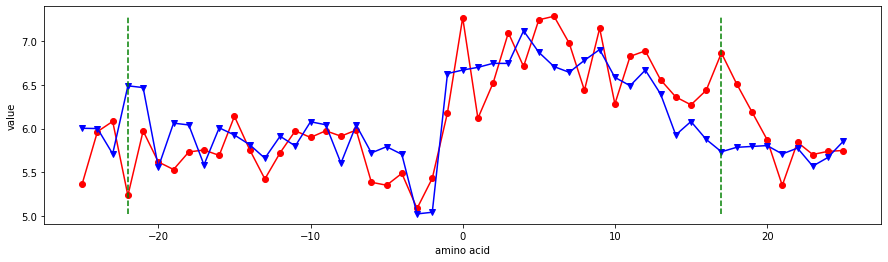

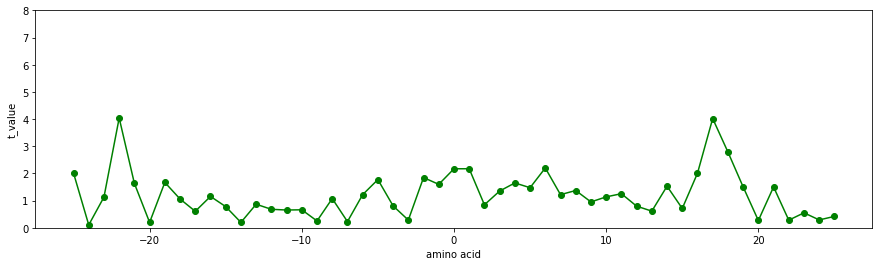

CEDJ970102
Composition of amino acids in anchored proteins (percent) (Cedano et al.,


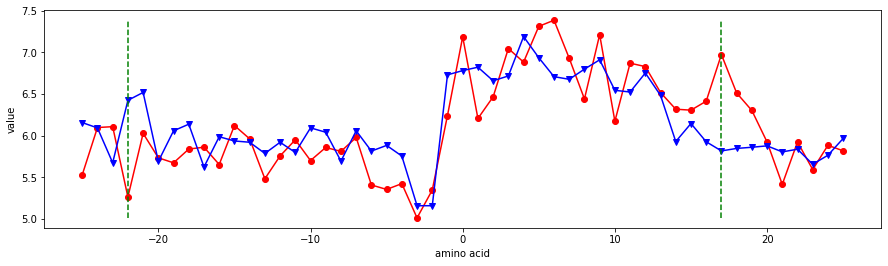

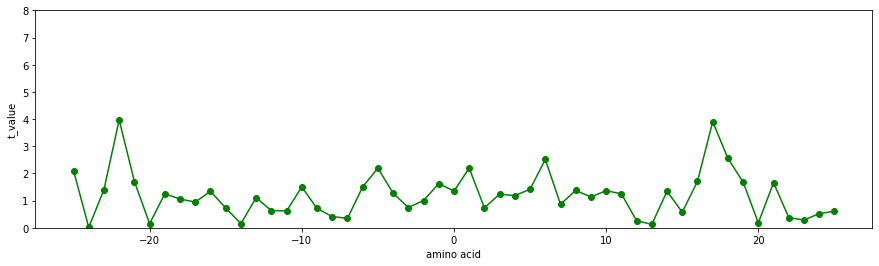

COSI940101
Electron-ion interaction potential values (Cosic, 1994)


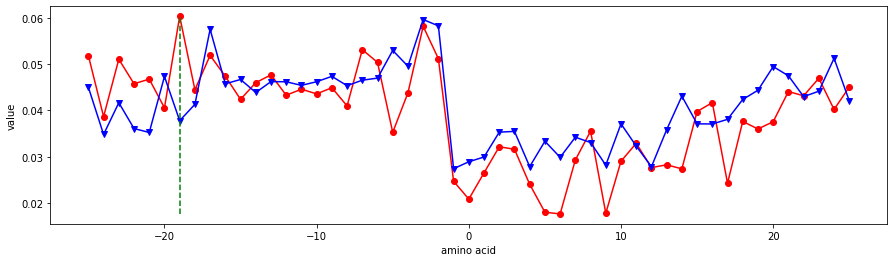

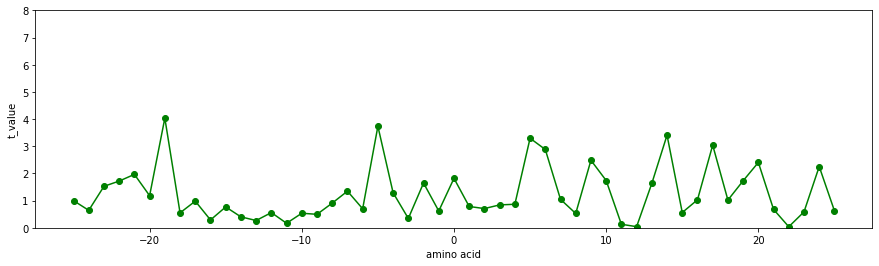

KUHL950101
Hydrophilicity scale (Kuhn et al., 1995)


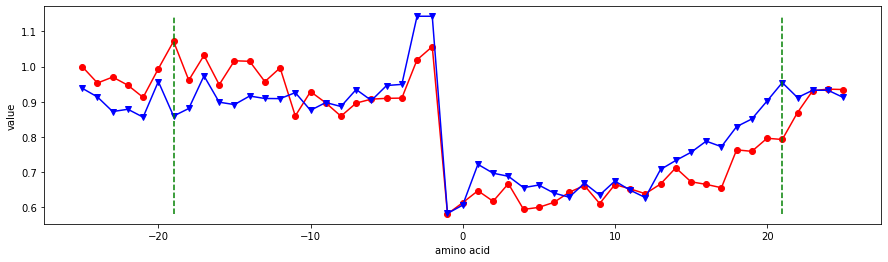

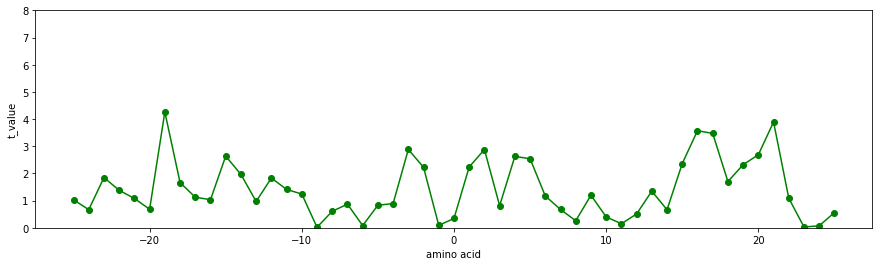

WOLR790101
Hydrophobicity index (Wolfenden et al., 1979)


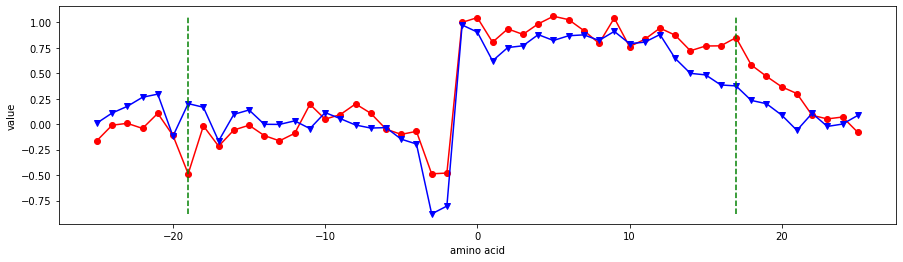

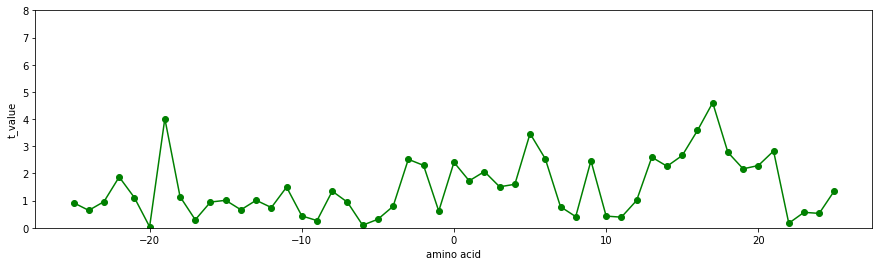

KIDA850101
Hydrophobicity-related index (Kidera et al., 1985)


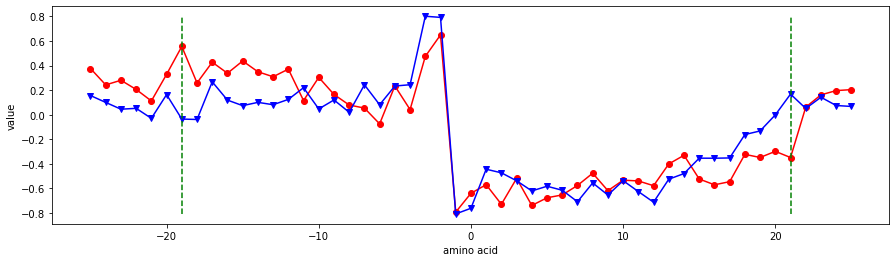

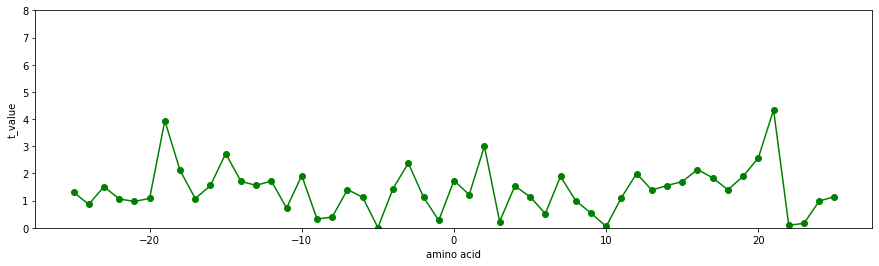

GUYH850105
Apparent partition energies calculated from Chothia index (Guy, 1985)


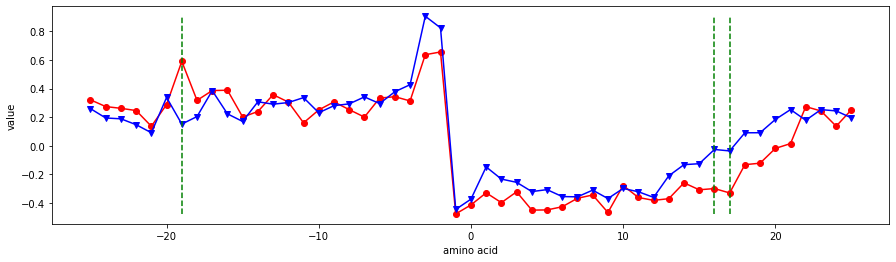

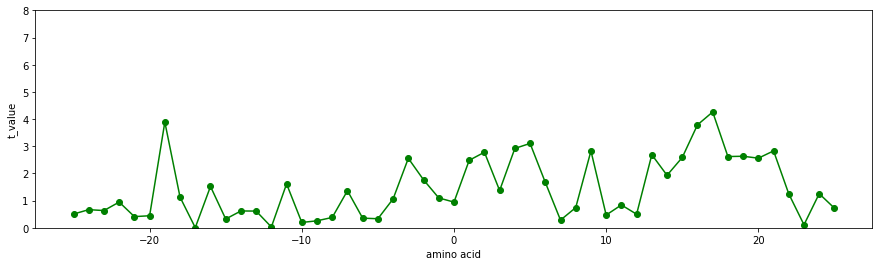

JACR890101
Weights from the IFH scale (Jacobs-White, 1989)


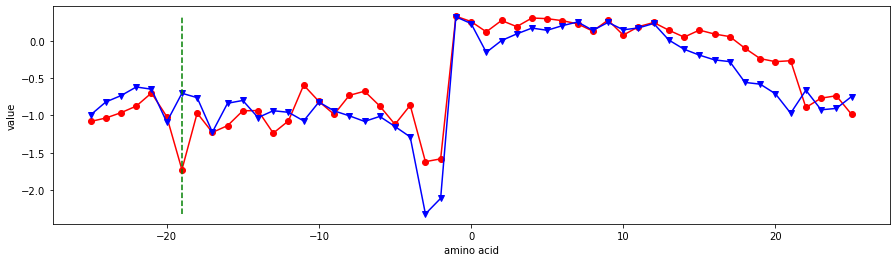

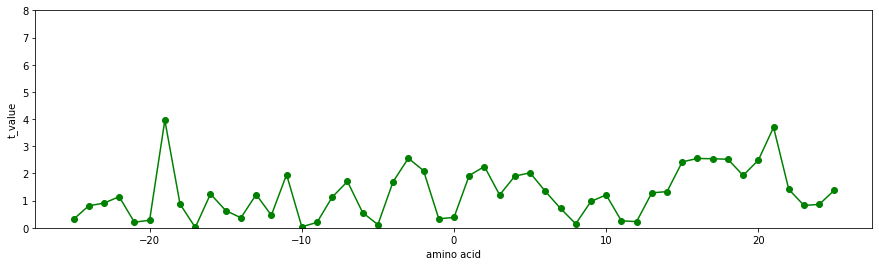

ENGD860101
Hydrophobicity index (Engelman et al., 1986)


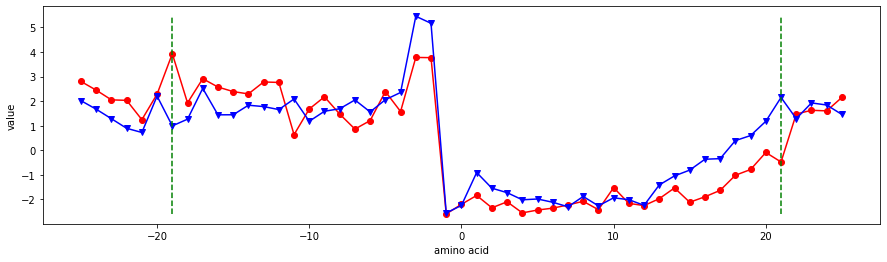

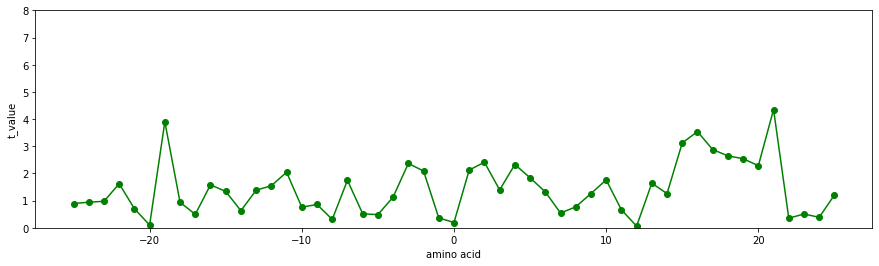

555


In [14]:
import matplotlib.pyplot as plt

i=0
frag=0
list=[]

for index_pm, row_pm in pmave.iterrows():
    for index_npm, row_npm in npmave.iterrows():
        if index_pm==index_npm:
            j=0
            list=[]
            while j<51:
                if ALLtvalue[i][j]=="null":
                    fragnul=0
                elif ALLtvalue[i][j]>t_boader_list[j]:
                    list.append(j-25)
                    
                    if j<10:
                        frag=1
                    # -24<j<10のTMR上流側で有意なときのみ出力
                    
                j=j+1
                
            if frag==1:
                frag=0
                print (index_pm)
                print (title_array[i])
                plt.figure(figsize=(15,4))
                plt.plot(columns , row_pm  , color = 'red'  , marker = 'o' )
                plt.plot(columns , row_npm , color = 'blue' , marker = 'v' )
                if len(list)!=0:
                    k=0
                    max_y=max(max(row_pm),max(row_npm))
                    min_y=min(min(row_pm),min(row_npm))
                    while k<len(list):
                        plt.plot([list[k], list[k]],[min_y, max_y], "green", linestyle='dashed')
                        k=k+1
                plt.xlabel('amino acid')                    
                plt.ylabel('value')
                plt.show()
#                 print (list)
#                 print ("\n")                
#                 plt.figure(figsize=(15,4))
#                 plt.plot(columns , deference_array[i+1]  , color = 'green'  , marker = 'o' )                
#                 plt.xlabel('amino acid')                    
#                 plt.ylabel('deference')
#                 plt.show()
    
                plt.figure(figsize=(15,4))
                plt.ylim(0,8)
                plt.plot(columns , ALLtvalue[i]  , color = 'green'  , marker = 'o' )                
                plt.xlabel('amino acid')                    
                plt.ylabel('t_value')
                plt.show()
                
                
                
            i=i+1
            
print (i)